## Lectura 4-2: Regresión lineal simple




"Todos los modelos son erróneos, pero algunos son útiles".

— **George E. P. Box**


## Modelando

Veamos un ejemplo sencillo de cómo afecta la velocidad de un coche a su distancia de frenado, es decir, a la distancia que recorre antes de detenerse. Para examinar esta relación, utilizaremos el conjunto de datos `cars`, que es un conjunto de datos predeterminado de `R`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('cars.csv') # Assuming a CSV source

# View(cars)
print(df)

# dim(cars)
print(df.shape)

# nrow(cars) and ncol(cars)
print(df.shape[0])
print(df.shape[1])

    speed  dist
0       4     2
1       4    10
2       7     4
3       7    22
4       8    16
5       9    10
6      10    18
7      10    26
8      10    34
9      11    17
10     11    28
11     12    14
12     12    20
13     12    24
14     12    28
15     13    26
16     13    34
17     13    34
18     13    46
19     14    26
20     14    36
21     14    60
22     14    80
23     15    20
24     15    26
25     15    54
26     16    32
27     16    40
28     17    32
29     17    40
30     17    50
31     18    42
32     18    56
33     18    76
34     18    84
35     19    36
36     19    46
37     19    68
38     20    32
39     20    48
40     20    52
41     20    56
42     20    64
43     22    66
44     23    54
45     24    70
46     24    92
47     24    93
48     24   120
49     25    85
(50, 2)
50
2



Leyendo la documentación nos enteramos de que se trata de datos recogidos durante la década de 1920 sobre la velocidad de los carros y la consiguiente distancia que tardan en detenerse. La tarea interesante aquí es determinar la distancia que recorre un coche antes de detenerse, cuando viaja a una velocidad determinada. Para ello, primero vamos a comparar la distancia de frenado con la velocidad.


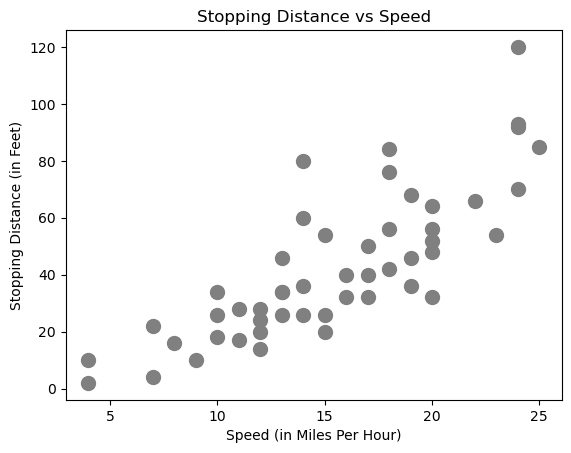

In [3]:
# Basic scatter plot
plt.scatter(df['speed'], df['dist'], c='grey', s=100)  # s represents size, equivalent to cex in R
plt.xlabel("Speed (in Miles Per Hour)")
plt.ylabel("Stopping Distance (in Feet)")
plt.title("Stopping Distance vs Speed")
plt.show()


Definamos ahora algo de terminología. Tenemos pares de datos, $(x_i, y_i)$, para $i = 1, 2, \ldots n$, donde $n$ es el tamaño de la muestra del conjunto de datos.
Utilizamos $i$ omo índice, simplemente por notación. Utilizamos $x_i$ acomo variable **predictora** (explicativa). La variable predictora se utiliza para ayudar a *predecir* o explicar la **variable de respuesta** (objetivo, resultado),
$y_i$.




En el ejemplo de `carros`, nos interesa utilizar la variable predictora `velocidad` para predecir y explicar la variable de respuesta `distancia`.

En términos generales, nos gustaría modelizar la relación entre $X$ y $Y$ utilizando la forma

$$
Y = f(X) + \epsilon.
$$

La función $f$ describe la relación funcional entre las dos variables, y el término $\epsilon$ se utiliza para tener en cuenta el error. Esto indica que si introducimos un valor dado de $X$ como entrada, nuestra salida
es un valor de $Y$, dentro de un cierto margen de error. Se puede considerar de varias maneras:

- Respuesta = Predicción + Error
- Respuesta = Señal + Ruido
- Respuesta = Modelo + Inexplicable
- Respuesta = Determinista + Aleatoria
- Respuesta = Explicable + Inexplicable

**¿Qué tipo de función deberíamos utilizar para $f(X)$ para los datos de `carros`?**

Podríamos intentar modelar los datos con una línea horizontal. Es decir, el modelo para $y$ no depende del valor de $x$. (Alguna función $f(X) = c$.) En el gráfico siguiente, vemos que esto no parece hacer un buen trabajo. Muchos de los puntos de datos están muy lejos de la línea naranja que representa $c$. Este es un ejemplo de **subajuste**. La solución obvia es hacer que la función $f(X)$ dependa realmente de $x$.

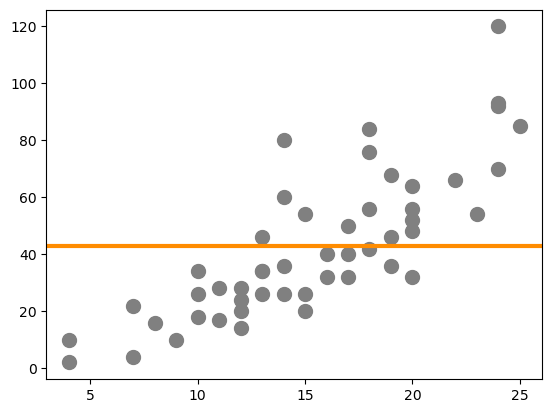

In [4]:
# underfit_model = lm(dist ~ 1, data = cars)
# This model is basically predicting the mean of dist for every speed.
mean_dist = np.mean(df['dist'])
plt.scatter(df['speed'], df['dist'], c='grey', s=100)
plt.axhline(y=mean_dist, color='darkorange', linewidth=3)
plt.show()

También podríamos intentar modelar los datos con una función muy "movible" que intente atravesar tantos puntos de datos como sea posible. Esto tampoco parece funcionar muy bien. ¡La distancia de frenado a una velocidad de 5 mph no debería estar fuera del gráfico! (Incluso en 1920). Este es un ejemplo de sobreajuste. 

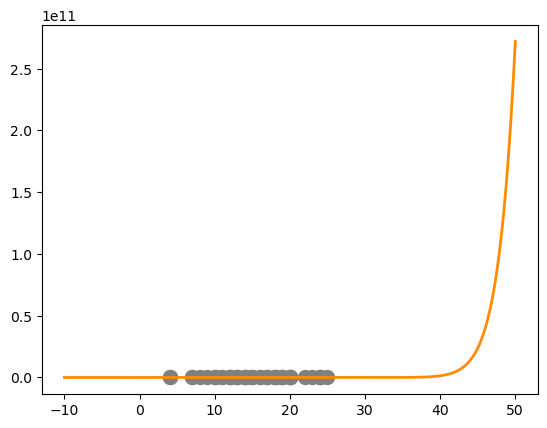

In [5]:
# overfit_model
# We use sklearn's PolynomialFeatures to create a polynomial regression
x = np.linspace(-10, 50, 200).reshape(-1, 1)
y = df['dist'].values.reshape(-1, 1)
poly = PolynomialFeatures(degree=18)
X_poly = poly.fit_transform(df['speed'].values.reshape(-1, 1))
model = LinearRegression().fit(X_poly, y)
X_query_poly = poly.fit_transform(x)
y_query = model.predict(X_query_poly)

plt.scatter(df['speed'], df['dist'], c='grey', s=100)
plt.plot(x, y_query, color='darkorange', linewidth=2)
plt.show()


Por último, podríamos intentar modelizar los datos con una línea bien elegida en lugar de uno de los dos extremos intentados anteriormente. La línea del gráfico siguiente parece resumir bastante bien la relación entre la distancia de frenado y la velocidad. A medida que aumenta la velocidad, aumenta la distancia necesaria para detenerse. Todavía hay alguna variación en esta línea, pero parece captar la tendencia general.


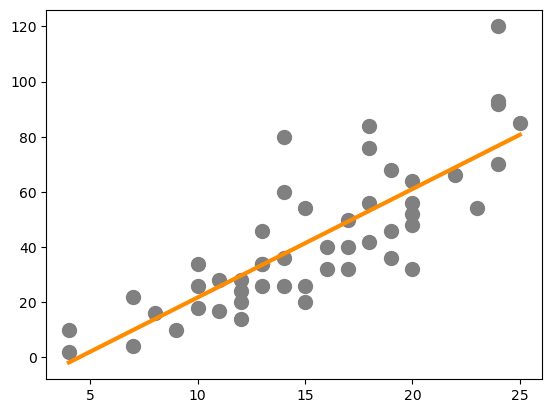

In [6]:
# stop_dist_model = lm(dist ~ speed, data = cars)
lin_reg = LinearRegression().fit(df['speed'].values.reshape(-1,1), df['dist'])
plt.scatter(df['speed'], df['dist'], c='grey', s=100)
plt.plot(df['speed'], lin_reg.predict(df['speed'].values.reshape(-1,1)), color='darkorange', linewidth=3)
plt.show()


Teniendo esto en cuenta, nos gustaría restringir nuestra elección de $f(X)$ a funciones *lineales* de $X$. Escribiremos nuestro modelo utilizando $\beta_1$ para la pendiente, y $\beta_0$ para el intercepto,

$$
Y = \beta_0 + \beta_1 X + \epsilon.
$$

### Modelo de regresión lineal simple

A continuación definiremos lo que denominaremos modelo de regresión lineal simple,

$$
Y_i = \beta_0 + \beta_1 x_i + \epsilon_i
$$

donde

$$
\epsilon_i \sim N(0, \sigma^2).
$$

Es decir, las $\epsilon_i$ son variables aleatorias normales *independientes e idénticamente distribuidas* (iid) con media $0$ y varianza $\sigma^2$. Este modelo tiene tres parámetros que deben estimarse: $\beta_0$, $\beta_1$ y $\sigma^2$, que son constantes fijas pero desconocidas.

* Aquí hemos modificado ligeramente nuestra notación. Ahora utilizamos $Y_i$ y $x_i$, ya que ajustaremos este modelo a un conjunto de $n$ puntos de datos, para $i = 1, 2, \ldots n$.

* Recordemos que utilizamos $Y$ mayúscula para indicar una variable aleatoria, y $y$ minúscula para denotar un valor potencial de la variable aleatoria. Como tendremos $n$ observaciones, tenemos $n$ variables aleatorias $Y_i$ y sus
posibles valores $y_i$.

* En el modelo de regresión lineal simple, se supone que las $x_i$ son constantes fijas y conocidas, por lo que se anotan con minúscula. La respuesta $Y_i$ sigue siendo una variable aleatoria debido al comportamiento aleatorio de la variable de error, $\epsilon_i$. Es decir, cada respuesta $Y_i$ está ligada a un observable $x_i$ y a un aleatorio, no observable, $\epsilon_i$.

* En esencia, podríamos pensar explícitamente que $Y_i$ tiene una distribución diferente para cada $X_i$. En otras palabras, $Y_i$ tiene una distribución condicional que depende del valor de $X_i$, escrito $x_i$. De este modo, seguimos sin hacer suposiciones de distribución de $X_i$, ya que sólo nos interesa la distribución de $Y_i$ para un valor concreto $x_i$.

$$
Y_i \mid X_i \sim N(\beta_0 + \beta_1 x_i, \sigma^2)
$$

Los aleatorios $Y_i$ son función de $x_i$, por lo que podemos escribir su media como función de $x_i$,

$$
\text{E}[Y_i \mid X_i = x_i] = \beta_0 + \beta_1 x_i.
$$

Sin embargo, su varianza permanece constante para cada $x_i$,

$$
\text{Var}[Y_i \mid X_i = x_i] = \sigma^2.
$$



Esto se muestra visualmente en la siguiente imagen. Vemos que para cualquier valor $x$, el valor esperado de $Y$ es $\beta_0 + \beta_1 x$. Para cada valor de $x$, $Y$ tiene la misma varianza $\sigma^2$.

![](../Images/SLR_model.png)



A menudo, hablamos directamente de las suposiciones que hace este modelo. Se pueden abreviar ingeniosamente con **LINE**.

-   **L**ineal. La relación entre $Y$ y $x$ es lineal, de la forma $\beta_0 + \beta_1 * x$.
-   **I**ndependientes. Los errores $\epsilon$ son independientes.
-   **N**ormal. Los errores, $\epsilon$ se distribuyen normalmente. Es decir, el "error" alrededor de la línea sigue una distribución normal.
-   **V**arianza igual. En cada valor de $x$, la varianza de $Y$ es la misma, $\sigma^2$.

También suponemos que los valores de $x$ son fijos, es decir, no aleatorios. No suponemos la distribución de la variable predictora.

Como nota al margen, a menudo nos referiremos a la regresión lineal simple como **SLR**. Explicación del nombre SLR:

-  **Regresión** significa simplemente que estamos intentando medir la relación entre una variable de respuesta y (una o más) variables predictoras. En el caso del SLR, tanto la respuesta como el predictor son variables *numéricas*.

- **Lineal** nos dice que nuestro modelo para $Y$ es una combinación lineal de los predictores $X$. (En este caso sólo uno.) En este momento, esto siempre resulta en un modelo que es una línea, pero más adelante veremos cómo esto no es siempre el caso.

-   **Simple** se refiere al hecho de que estamos utilizando una única variable predictora. Más adelante utilizaremos múltiples variables predictoras.


Así que SLR modela $Y$ como una función lineal de $X$, pero ¿cómo definimos realmente una buena recta? Hay un número infinito de rectas que podríamos utilizar, así que intentaremos encontrar una con "errores pequeños". Esa es una línea con
tantos puntos como sea posible. La pregunta ahora es: ¿cómo encontrar esa recta? Podríamos hacer varias cosas.

Podríamos encontrar la recta que tenga la menor distancia máxima desde cualquiera de los puntos a la recta. Es decir,

$$
\underset{\beta_0, \beta_1}{\mathrm{argmin}} \max|y_i - (\beta_0 + \beta_1 x_i)|.
$$

Podríamos encontrar la recta que minimiza la suma de todas las distancias de los puntos a la recta. Es decir,

$$
\underset{\beta_0, \beta_1}{\mathrm{argmin}} \sum_{i = 1}^{n}|y_i - (\beta_0 + \beta_1 x_i)|.
$$

Podríamos encontrar la recta que minimiza la suma de todas las distancias al cuadrado de los puntos a la recta. Es decir,

$$
\underset{\beta_0, \beta_1}{\mathrm{argmin}} \sum_{i = 1}^{n}(y_i - (\beta_0 + \beta_1 x_i))^2.
$$

Esta última opción se denomina método de los **mínimos cuadrados**. Básicamente, es el método de facto para ajustar una recta a los datos. (Puede que incluso lo hayas visto antes en un curso de álgebra lineal.) Su popularidad se debe en gran parte a que es matemáticamente "fácil". (Lo cual era importante históricamente, ya que los ordenadores son un artilugio moderno.) También es muy popular porque muchas relaciones se aproximan bien mediante una
función lineal.



## Enfoque de mínimos cuadrados

Dadas unas observaciones $(x_i, y_i)$, para $i = 1, 2, \ldots n$, queremos
encontrar valores de $\beta_0$ y $\beta_1$ que minimicen

$$
f(\beta_0, \beta_1) = \sum_{i = 1}^{n}(y_i - (\beta_0 + \beta_1 x_i))^2 = \sum_{i = 1}^{n}(y_i - \beta_0 - \beta_1 x_i)^2.
$$

Llamaremos a estos valores $\hat{\beta}_0$ y $\hat{\beta}_1$.

En primer lugar, tomamos una derivada parcial con respecto a ambos $\beta_0$ y
$\beta_1$.

$$
\begin{aligned}
\frac{\partial f}{\partial \beta_0} &= -2 \sum_{i = 1}^{n}(y_i - \beta_0 - \beta_1 x_i) \\
\frac{\partial f}{\partial \beta_1} &= -2 \sum_{i = 1}^{n}(x_i)(y_i - \beta_0 - \beta_1 x_i)
\end{aligned}
$$

A continuación, fijamos cada una de las derivadas parciales igual a cero y resolvemos el
sistema de ecuaciones resultante.

$$
\begin{aligned}
\sum_{i = 1}^{n}(y_i - \beta_0 - \beta_1 x_i) &= 0 \\
\sum_{i = 1}^{n}(x_i)(y_i - \beta_0 - \beta_1 x_i) &= 0
\end{aligned}
$$

Al resolver el sistema de ecuaciones, un reordenamiento algebraico común da lugar a las **ecuaciones normales**.

$$
\begin{aligned}
n \beta_0 + \beta_1 \sum_{i = 1}^{n} x_i &= \sum_{i = 1}^{n} y_i\\
\beta_0 \sum_{i = 1}^{n} x_i + \beta_1 \sum_{i = 1}^{n} x_i^2 &= \sum_{i = 1}^{n} x_i y_i  
\end{aligned}
$$

Por último, terminamos de resolver el sistema de ecuaciones.

$$
\begin{aligned}
\hat{\beta}_1 &= \frac{\sum_{i = 1}^{n} x_i y_i - \frac{(\sum_{i = 1}^{n} x_i)(\sum_{i = 1}^{n} y_i)}{n}}{\sum_{i = 1}^{n} x_i^2 - \frac{(\sum_{i = 1}^{n} x_i)^2}{n}} = \frac{S_{xy}}{S_{xx}}\\
\hat{\beta}_0 &= \bar{y} - \hat{\beta}_1 \bar{x}
\end{aligned}
$$

Aquí hemos definido algunas notaciones para la expresión que hemos obtenido. Observa que tienen formas alternativas con las que es mucho más fácil trabajar. (No lo haremos aquí, pero puedes intentar demostrar las igualdades a continuación por tu cuenta, por "diversión"). Utilizamos la letra mayúscula $S$ para denotar la "suma" que sustituye a la letra mayúscula $\Sigma$ cuando calculamos estos valores basándonos en los datos observados, $(x_i ,y_i)$. Los subíndices como $xy$ denotan sobre qué variables se aplica la función $(z - \bar{z})$.

$$
\begin{aligned}
S_{xy} &= \sum_{i = 1}^{n} x_i y_i - \frac{(\sum_{i = 1}^{n} x_i)(\sum_{i = 1}^{n} y_i)}{n}  = \sum_{i = 1}^{n}(x_i - \bar{x})(y_i - \bar{y})\\
S_{xx} &= \sum_{i = 1}^{n} x_i^2 - \frac{(\sum_{i = 1}^{n} x_i)^2}{n}  = \sum_{i = 1}^{n}(x_i - \bar{x})^2\\
S_{yy} &= \sum_{i = 1}^{n} y_i^2 - \frac{(\sum_{i = 1}^{n} y_i)^2}{n}  = \sum_{i = 1}^{n}(y_i - \bar{y})^2
\end{aligned}
$$

Obsérvese que estos sumatorios $S$ no deben confundirse con la
desviación típica $s$.

Utilizando las expresiones alternativas anteriores para $S_{xy}$ and $S_{xx}$,  llegamos a una expresión más limpia y útil para $\hat{\beta}_1$.

$$
\hat{\beta}_1 = \frac{S_{xy}}{S_{xx}} = \frac{\sum_{i = 1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i = 1}^{n}(x_i - \bar{x})^2}
$$


Veamos como podemos usar ´Python´ para realizar estos calculos

In [7]:
# Calculations of Sxy, Sxx, Syy, beta_0_hat, and beta_1_hat
x = df['speed']
y = df['dist']


In [8]:
Sxy = np.sum((x - np.mean(x)) * (y - np.mean(y)))
Sxx = np.sum((x - np.mean(x)) ** 2)
Syy = np.sum((y - np.mean(y)) ** 2)
print(Sxy, Sxx, Syy)

5387.400000000001 1370.0 32538.980000000003



Por último, calcule $\hat{\beta}_0$ y $\hat{\beta}_1$.


In [9]:
beta_1_hat = Sxy / Sxx
beta_0_hat = np.mean(y) - beta_1_hat * np.mean(x)
print(beta_0_hat, beta_1_hat)

-17.57909489051096 3.932408759124088


¿Qué nos dicen estos valores sobre nuestro conjunto de datos?

El *parámetro de pendiente* $\beta_1$ nos dice que para un aumento de la velocidad de una milla por hora, la **media** de la distancia de frenado aumenta en $\beta_1$. Es importante especificar que estamos hablando de la media. Recordemos que $\beta_0 + \beta_1 x$ es la media de $Y$, en este caso la distancia de frenado, para un valor concreto de $x$. (En este caso la velocidad.) Así que $\beta_1$ nos dice cómo se ve afectada la media de $Y$ por un cambio en $x$.

Del mismo modo, la *estimación* $\hat{\beta}_1 = 3.93$ nos dice que para un aumento de la velocidad de una milla por hora, la **estimación** *media* de la distancia de frenado aumenta en $3.93$ pies. Aquí debemos asegurarnos de especificar que estamos hablando de una cantidad estimada. Recordemos que $\hat{y}$ es la media estimada de $Y$, por lo que $\hat{\beta}_1$ nos dice cómo se ve afectada la media estimada de $Y$ por $\hat{beta}_1$.

El *parámetro de intercepción* $\beta_0$ nos dice la distancia **media** de parada para un coche que viaja a cero millas por hora. (La *estimación* $\hat{\beta}_0 =-17.58$ nos dice que la **estimación** de la distancia media de parada para un coche que viaja a cero millas por hora es $-17.58$ pies. Entonces, cuando frenas un coche que no se mueve, ¿se mueve hacia atrás? Esto no parece correcto. (La extrapolación, que veremos más adelante, es el problema aquí).



### Hacer predicciones

Ahora podemos escribir la recta **ajustada** o estimada,

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x.
$$

En este caso,

$$
\hat{y} = -17.58 + 3.93 \times x %
$$

Ahora podemos utilizar esta línea para hacer predicciones.


In [10]:
# Check values
print(8 in df['speed'].unique())
print(21 in df['speed'].unique())

True
False


In [11]:
# Prediction
print(beta_0_hat + beta_1_hat * 8)

13.880175182481747


In [12]:
# Check speed range
print(df['speed'].min() < 21 and 21 < df['speed'].max())


True


In [13]:
# Prediction
print(beta_0_hat + beta_1_hat * 21)

65.0014890510949



Por último, podemos hacer una predicción de la distancia de frenado de un coche que circula a 80 km/h. Esto se considera
<a href="https://xkcd.com/605/"
target="_blank"><strong>extrapolación</strong></a> ya que 50 no es un valor observado de $x$ y está fuera del rango de datos. Deberíamos confiar menos en predicciones de este tipo.


In [14]:
# Check speed range
print(df['speed'].min() < 50 and 50 < df['speed'].max())


False



$$
\hat{y} = -17.58 + 3.93 \times 50 % = 179.04
$$


In [15]:
# Prediction for speed 50
print(beta_0_hat + beta_1_hat * 50)

179.04134306569344



Hoy en día, los coches circulan a 80 km/h con bastante facilidad, ¡pero no en los años veinte!

Este es también un problema que vimos al interpretar $\hat{\beta}_0 = -17.58$, que equivale a hacer una predicción en $x = 0$. No debemos confiar en la relación lineal estimada fuera del rango de datos que hemos observado.






### Residuales

Si pensamos en nuestro modelo como "Respuesta = Predicción + Error", entonces podemos
escribirlo como

$$
y = \hat{y} + e.
$$

Definimos entonces un **residual** como el valor observado menos el
valor previsto.

$$
e_i = y_i - \hat{y}_i
$$

Calculemos el residuo de la predicción que hicimos para un coche que viaja a 8 millas por hora. En primer lugar, necesitamos obtener el valor observado de $y$ para este valor de $x$.

In [16]:
# Para encontrar índices basados en una condición:
indices = df[df['speed'] == 8].index
print(indices)

Int64Index([4], dtype='int64')


In [17]:
# Para obtener una fila específica por índice:
print(df.iloc[4])

speed     8
dist     16
Name: 4, dtype: int64


In [18]:
# Para obtener filas basadas en una condición:
print(df[df['speed'] == 8])

   speed  dist
4      8    16


In [19]:
import statsmodels.api as sm
# Estableciendo la regresión
X = df['speed']
X = sm.add_constant(X)  # Añade una constante (intercepto) al modelo
y = df['dist']

model = sm.OLS(y, X).fit()

beta_0_hat = model.params['const']
beta_1_hat = model.params['speed']


A continuación, podemos calcular el residuo.



$$
e = 16 - 13.88 = 2.12
$$


In [20]:
16- beta_0_hat -beta_1_hat*8

2.119824817518257


### Estimación de la varianza

Ahora vamos a utilizar los residuos de cada uno de los puntos para crear una estimación
de la varianza, $\sigma^2$.

Recordemos que,

$$
\text{E}[Y_i \mid X_i = x_i] = \beta_0 + \beta_1 x_i.
$$

Entonces,

$$
\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i
$$

es una estimación natural de la media de $Y_i$ para un valor dado de $x_i$.

Además, recordemos que cuando especificamos el modelo, teníamos tres parámetros desconocidos: $\beta_0$, $\beta_1$ y $\sigma^2$. El método de los mínimos cuadrados nos dio estimaciones para $\beta_0$ y $\beta_1$, sin embargo, todavía tenemos que ver una estimación para $\sigma^2$. Ahora definiremos $s_e^2$ que será una estimación para $\sigma^2$.

$$
\begin{aligned}
s_e^2 &= \frac{1}{n - 2} \sum_{i = 1}^{n}(y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i))^2 \\
      &= \frac{1}{n - 2} \sum_{i = 1}^{n}(y_i - \hat{y}_i)^2 \\
      &= \frac{1}{n - 2} \sum_{i = 1}^{n} e_i^2
\end{aligned}
$$

Probablemente parezca una estimación natural, aparte del uso de $n - 2$. En realidad, debería parecerse bastante a algo que hemos visto antes.

$$
s^2 = \frac{1}{n - 1}\sum_{i=1}^{n}(x_i - \bar{x})^2
$$



Aquí, $s^2$ es la estimación de $\sigma^2$ cuando tenemos una única variable aleatoria $X$. En este caso $\bar{x}$ es una estimación de $\mu$ que se supone que es la misma para cada $x$.

Ahora, en el caso de regresión, con $s_e^2$ cada $y$ tiene una media diferente debido a la relación con $x$. Así, para cada $y_i$, utilizamos una estimación diferente de la media, es decir $\hat{y}_i$.


In [21]:
y_hat = model.fittedvalues
e = y - y_hat
n = len(e)
s2_e = sum(e**2) / (n - 2)
s2_e

236.53168856447687


Al igual que con la medida univariante de la varianza, este valor de `r round(s2_e, 2)` no tiene una interpretación práctica en términos de distancia de frenado. Sin embargo, si se toma la raíz cuadrada, se calcula la desviación estándar de los residuos, también conocida como *error estándar residual*.

In [22]:
s_e = np.sqrt(s2_e)
s_e

15.379586748819907


Esto nos dice que nuestras estimaciones de la distancia media de frenado están "típicamente" desviadas por 15.37 pies.



## Descomposición de la variación

Podemos reexpresar $y_i - \bar{y}$, que mide la desviación de una observación respecto a la media muestral, de la siguiente manera,

$$
y_i - \bar{y} = (y_i - \hat{y}_i) + (\hat{y}_i - \bar{y}).
$$

Este es el truco matemático común de "sumar cero". En este caso sumamos y restamos $\hat{y}_i$.

Aquí, $y_i - \hat{y}_i$ mide la desviación de una observación de la línea de regresión ajustada y $\hat{y}_i - \bar{y}$ mide la desviación de la línea de regresión ajustada de la media muestral.

Si elevamos al cuadrado y sumamos ambos lados de la ecuación anterior, podemos obtener lo siguiente,

$$
\sum_{i=1}^{n}(y_i - \bar{y})^2 = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \sum_{i=1}^{n}(\hat{y}_i - \bar{y})^2.
$$

Esto debería ser algo alarmante o asombroso. ¿Cómo puede ser cierto? Por ahora dejaremos esta pregunta sin respuesta. (Piensa en ello, y tal vez intenta demostrarlo.) Ahora definiremos tres de las cantidades que se ven en esta ecuación.


#### Suma de cuadrados Total

$$
\text{SST} = \sum_{i=1}^{n}(y_i - \bar{y})^2
$$


La cantidad "Suma de cuadrados total", o $\text{SST}$, representa la **variación total** de los valores $y$ observados. Esto debería ser una expresión de aspecto familiar. Tenga en cuenta que,

$$
s ^ 2 = \frac{1}{n - 1}\sum_{i=1}^{n}(y_i - \bar{y})^2 = \frac{1}{n - 1} \text{SST}.
$$



#### Suma de los cuadrados de la regresión
$$
\text{SSReg} = \sum_{i=1}^{n}(\hat{y}_i - \bar{y})^2
$$

La cantidad "Suma de cuadrados de regresión", $\text{SSReg}$, representa la **variación explicada** de los valores $y$ observados.



#### Suma de los cuadrados del error

$$
\text{SSE} = \text{RSS} = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

La cantidad "Suma de los cuadrados del error", $\text{SSE}$,representa la **variación no explicada** de los valores $y$ observados. A menudo verá $\text{SSE}$  escrito como  $\text{RSS}$, o "Suma Residual de Cuadrados".


In [23]:
SST = sum((y - y.mean()) ** 2)
SSReg = sum((y_hat - y.mean()) ** 2)
SSE = sum(e ** 2)


Tenga en cuenta que,

$$
s_e^2 = \frac{\text{SSE}}{n - 2}.
$$


In [24]:
# Imprimir los resultados
print({'SST': SST, 'SSReg': SSReg, 'SSE': SSE})
print(SSE / (n - 2))

{'SST': 32538.980000000003, 'SSReg': 21185.45894890511, 'SSE': 11353.52105109489}
236.53168856447687



Podemos verificar que esto coincide con nuestro cálculo anterior de $s_e^2$.


In [25]:
print(s2_e == SSE / (n - 2))


True



Estas tres medidas tampoco tienen una interpretación práctica importante individualmente. Pero juntos están a punto de revelar una nueva estadística que ayudará a medir la solidez de un modelo SLR.



### Coeficiente de determinación

El **coeficiente de determinación**, $R^2$, se define como

$$
\begin{aligned}
R^2 &= \frac{\text{SSReg}}{\text{SST}} = \frac{\sum_{i=1}^{n}(\hat{y}_i - \bar{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2} \\[2.5ex]
    &= \frac{\text{SST} - \text{SSE}}{\text{SST}} = 1 - \frac{\text{SSE}}{\text{SST}} \\[2.5ex]
    &= 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2} =
1 - \frac{\sum_{i = 1}^{n}e_i^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
\end{aligned}
$$

El coeficiente de determinación se interpreta como la proporción de la variación observada en $y$ que puede explicar el modelo de regresión lineal simple.

In [26]:
R2 = SSReg / SST
print(R2)

0.6510793807582508





Para el ejemplo de  los carros  calculamos $R^2 = 0.65$. Entonces diremos que $65\%$ de la variabilidad observada en la distancia de frenado se explica por la relación lineal con la velocidad.


Los siguientes gráficos demuestran visualmente las tres "sumas de cuadrados" para un conjunto de datos simulado que tiene $R^2 = 0.92$, que es un valor algo alto. Observe en el gráfico final que las flechas naranjas representan una proporción mayor del total de flechas.

![](../Images/SST.png)

Los siguientes gráficos demuestran nuevamente visualmente las tres “sumas de cuadrados”, esta vez para un conjunto de datos simulado que tiene $R^2 = 0.19$. Observe en el gráfico final que ahora las flechas azules representan una proporción mayor del total de flechas.

![](../Images/SST2.png)

![](../Images/SST2.png)

## Hacer regresiones en Python

In [27]:
import statsmodels.formula.api as smf

# estimate the model and assign the result to linear_model
linear_model = smf.ols(formula='dist ~ speed', data=df).fit()

# print the standard output of the estimated OLS RegressionResults object to the console
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           1.49e-12
Time:                        17:53:45   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.0

In [28]:
import pandas as pd

# get the coefficient estimates
coefficients = linear_model.params

# get the standard errors
standard_errors = linear_model.bse

# get the t-values
t_values = linear_model.tvalues

# get the p-values
p_values = linear_model.pvalues

# organize the results into a data frame
results_df = pd.DataFrame({
    'Coefficient': coefficients,
    'Standard Error': standard_errors,
    't Value': t_values,
    'p Value': p_values
})

print(results_df)

           Coefficient  Standard Error   t Value       p Value
Intercept   -17.579095        6.758440 -2.601058  1.231882e-02
speed         3.932409        0.415513  9.463990  1.489836e-12


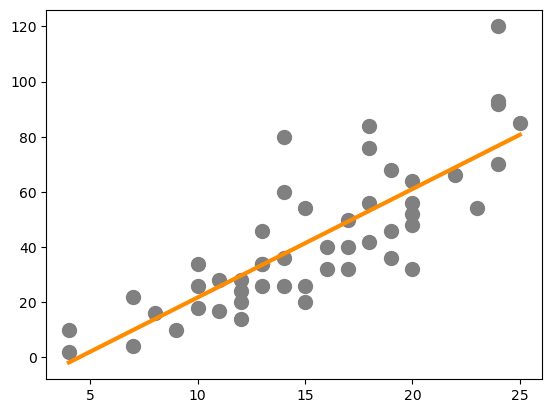

In [29]:
# get the predicted values
y_hat = linear_model.fittedvalues

# plot the actual and predicted values from regression
plt.scatter(df['speed'], df['dist'], c='grey', s=100)
plt.plot(df['speed'], y_hat, color='darkorange', linewidth=3)
plt.show()

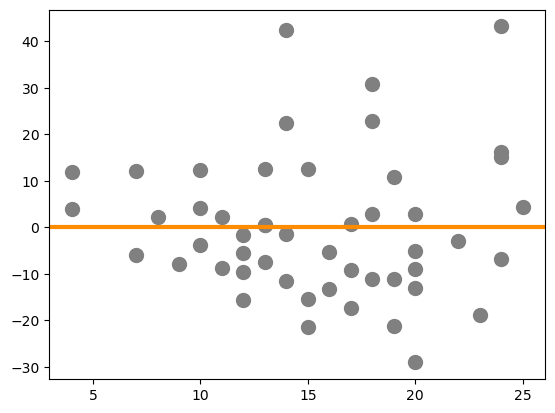

In [30]:
# get the residuals
residuals = linear_model.resid


# plot the residuals
plt.scatter(df['speed'], residuals, c='grey', s=100)
#put the average residual line
plt.axhline(y=np.mean(residuals), color='darkorange', linewidth=3)


In [31]:
# get the R-squared value
R2 = linear_model.rsquared
print(R2)

0.6510793807582509


In [32]:
# get the adjusted R-squared value
adj_R2 = linear_model.rsquared_adj
print(adj_R2)


0.6438102011907145


In [33]:
# get the standard error of the regression
s_e = linear_model.mse_resid ** 0.5
print(s_e)

15.379586748819907


In [34]:
# predict the stopping distance for a speed of several values
speeds = [8, 21, 50]
for speed in speeds:
    print(linear_model.predict({'speed': speed}))
    

0    13.880175
dtype: float64
0    65.001489
dtype: float64
0    179.041343
dtype: float64


Consulta el link [https://www.statsmodels.org/stable/index.html](https://www.statsmodels.org/stable/index.html) para ver la documentación de la librería `statsmodels` de Python.